# Predicting if a Patient Has Breast Cancer

* Create a new conda project
* Create an environment for it using miniconda terminal
    + conda create --prefix ./.env pandas numpy matplotlib jupyter scikit-learn seaborn
* Download the dataset from Kaggle
* Import the packages from our env to check everything is OK

---

## Part 1: Data Preprocessing

Dataset can be downloaded from [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

### Import the libraries and the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# # https://intel.github.io/scikit-learn-intelex/ accelerates sklearn apps
# from sklearnex import patch_sklearn
# patch_sklearn()

In [3]:
dataset = pd.read_csv('data/data.csv')

In [4]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data Exploration (Data Exploratory Analysis == DEA)

In [5]:
dataset.shape

(569, 33)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Check if we have missing values in our dataset
print('No missing values in our dataset!' if sum(dataset.isnull().sum()) 
      else 'We have missing values in our dataset :-()')

No missing values in our dataset!


In [8]:
# select all categorical columns/features in our dataset
dataset.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [9]:
len(dataset.select_dtypes(include='object').columns)

1

In [10]:
# select all numerical columns/features in our dataset
dataset.select_dtypes(include=['float64', 'int64']).columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [11]:
len(dataset.select_dtypes(include=['float64', 'int64']).columns)

32

In [12]:
# statistical summary
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [13]:
# dataset.describe().T

In [14]:
# get the list of all the columns/features in our dataset
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### Dealing with Missing (null) Values

In [15]:
# checking if there are null values in our dataset
dataset.isnull().values.any()

True

In [16]:
dataset.isnull().values.sum()

569

In [17]:
# getting the columns with null values
dataset.columns[dataset.isnull().any()]

Index(['Unnamed: 32'], dtype='object')

In [18]:
# getting the count for the columns with null values
len(dataset.columns[dataset.isnull().any()])

1

In [19]:
# all values in this column are null values
dataset['Unnamed: 32'].count()

0

In [20]:
# drop the column which has all values null, not useful for DA
dataset.drop(columns='Unnamed: 32',
             inplace=True)

In [21]:
# check the new shape of our dataset (it was (569, 33) before dropping)
dataset.shape

(569, 32)

In [22]:
# checking again if there are null values in our dataset
dataset.isnull().values.any()

False

### Dealing with Categorigal Data

In [23]:
# checking again the categorical features
dataset.select_dtypes(include='object') \
    .columns

Index(['diagnosis'], dtype='object')

In [24]:
# check number of unique values in the 'diagnosis' column
print(" The unique value(s) in the diagnosis column are", \
      dataset['diagnosis'].unique(), "\n", \
      "The number of unique values is:", 
      dataset['diagnosis'].nunique())

 The unique value(s) in the diagnosis column are ['M' 'B'] 
 The number of unique values is: 2


In [25]:
# one hot encoding
# convert categorical values ['M' 'B']
# into true or false values [0, 1]
# and drop the original values
dataset = pd.get_dummies(data=dataset, 
                         drop_first=True)

In [26]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### Countplot

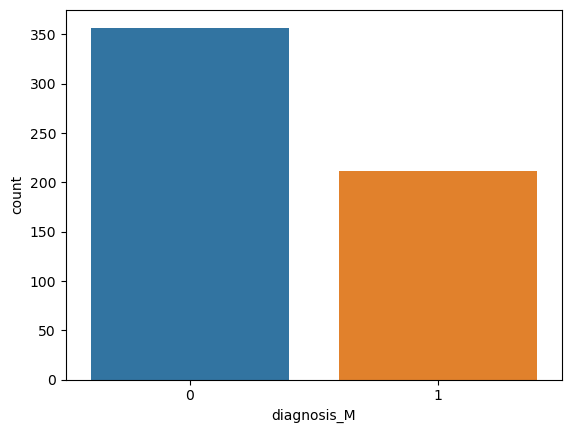

In [27]:
sns.countplot(x=dataset['diagnosis_M'],
              label='Count')
plt.show()

In [28]:
# count benign values (B)
(dataset.diagnosis_M == 0).sum()

357

In [29]:
# count malignant values (M)
(dataset.diagnosis_M == 1).sum()

212

### Correlation Matrix and Heatmap

In [30]:
dataset_tmp = dataset.drop(columns='diagnosis_M')

In [31]:
dataset_tmp.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


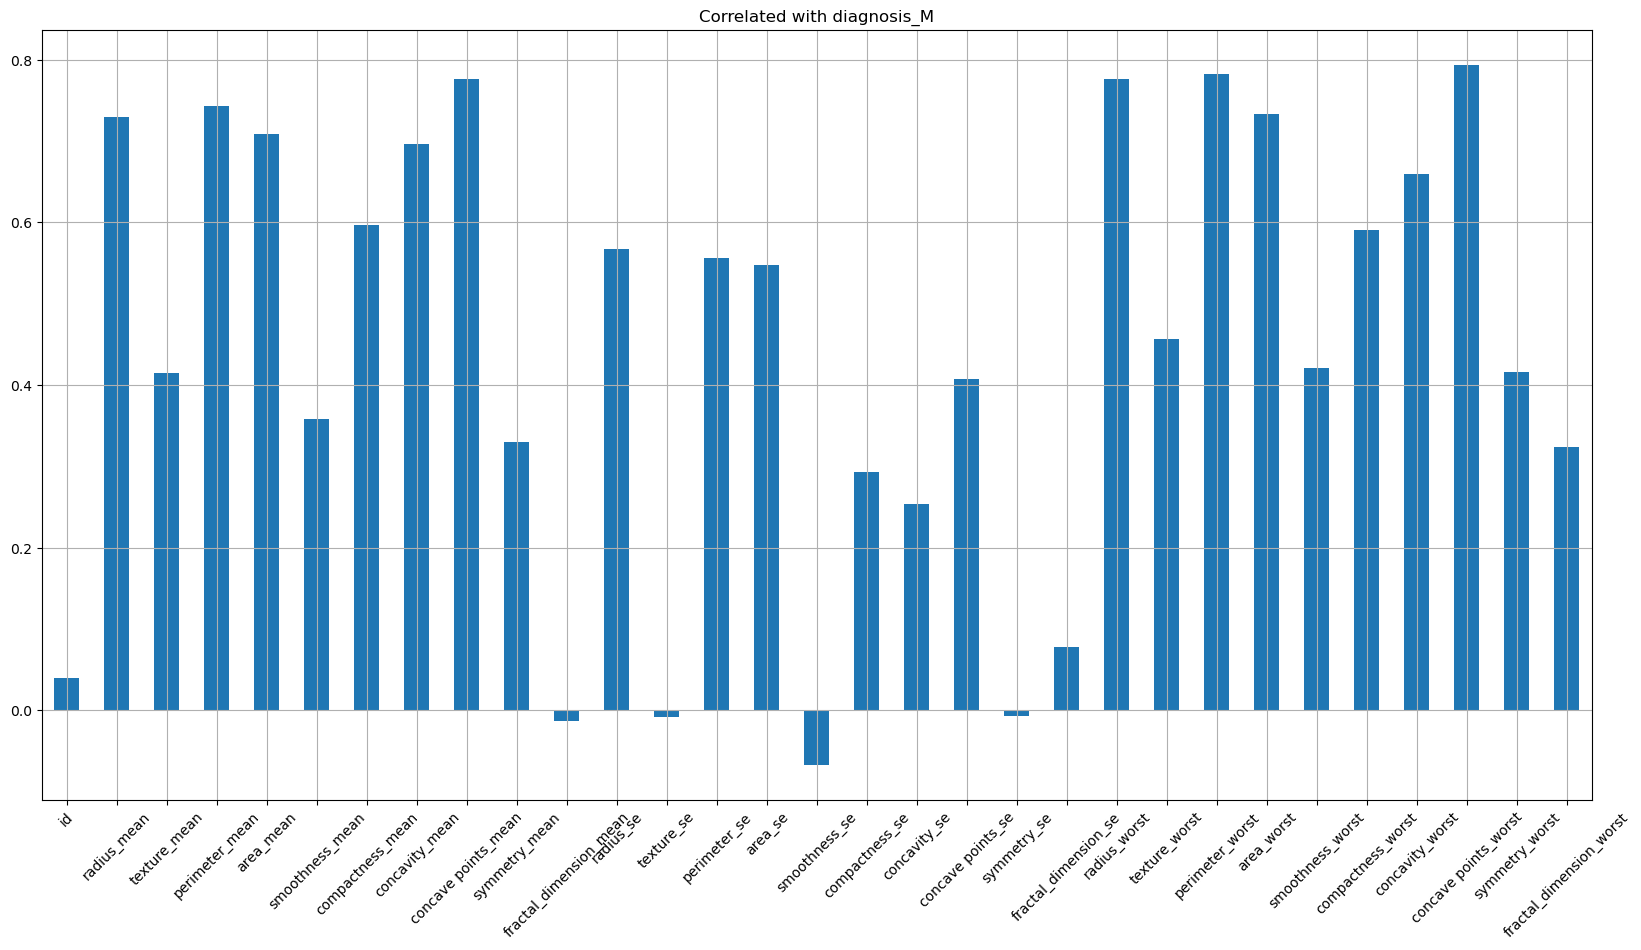

In [32]:
# display a bar chart with the correlation between our features (dataset_tmp)
# and our target values (dataset w/ the diagnosis_M target column)
dataset_tmp.corrwith(dataset['diagnosis_M']). \
    plot.bar(figsize=(20, 10),
             title='Correlated with diagnosis_M',
             rot=45,
             grid=True,
            );

In [33]:
# Correlation Matrix
corr = dataset.corr()

In [34]:
corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


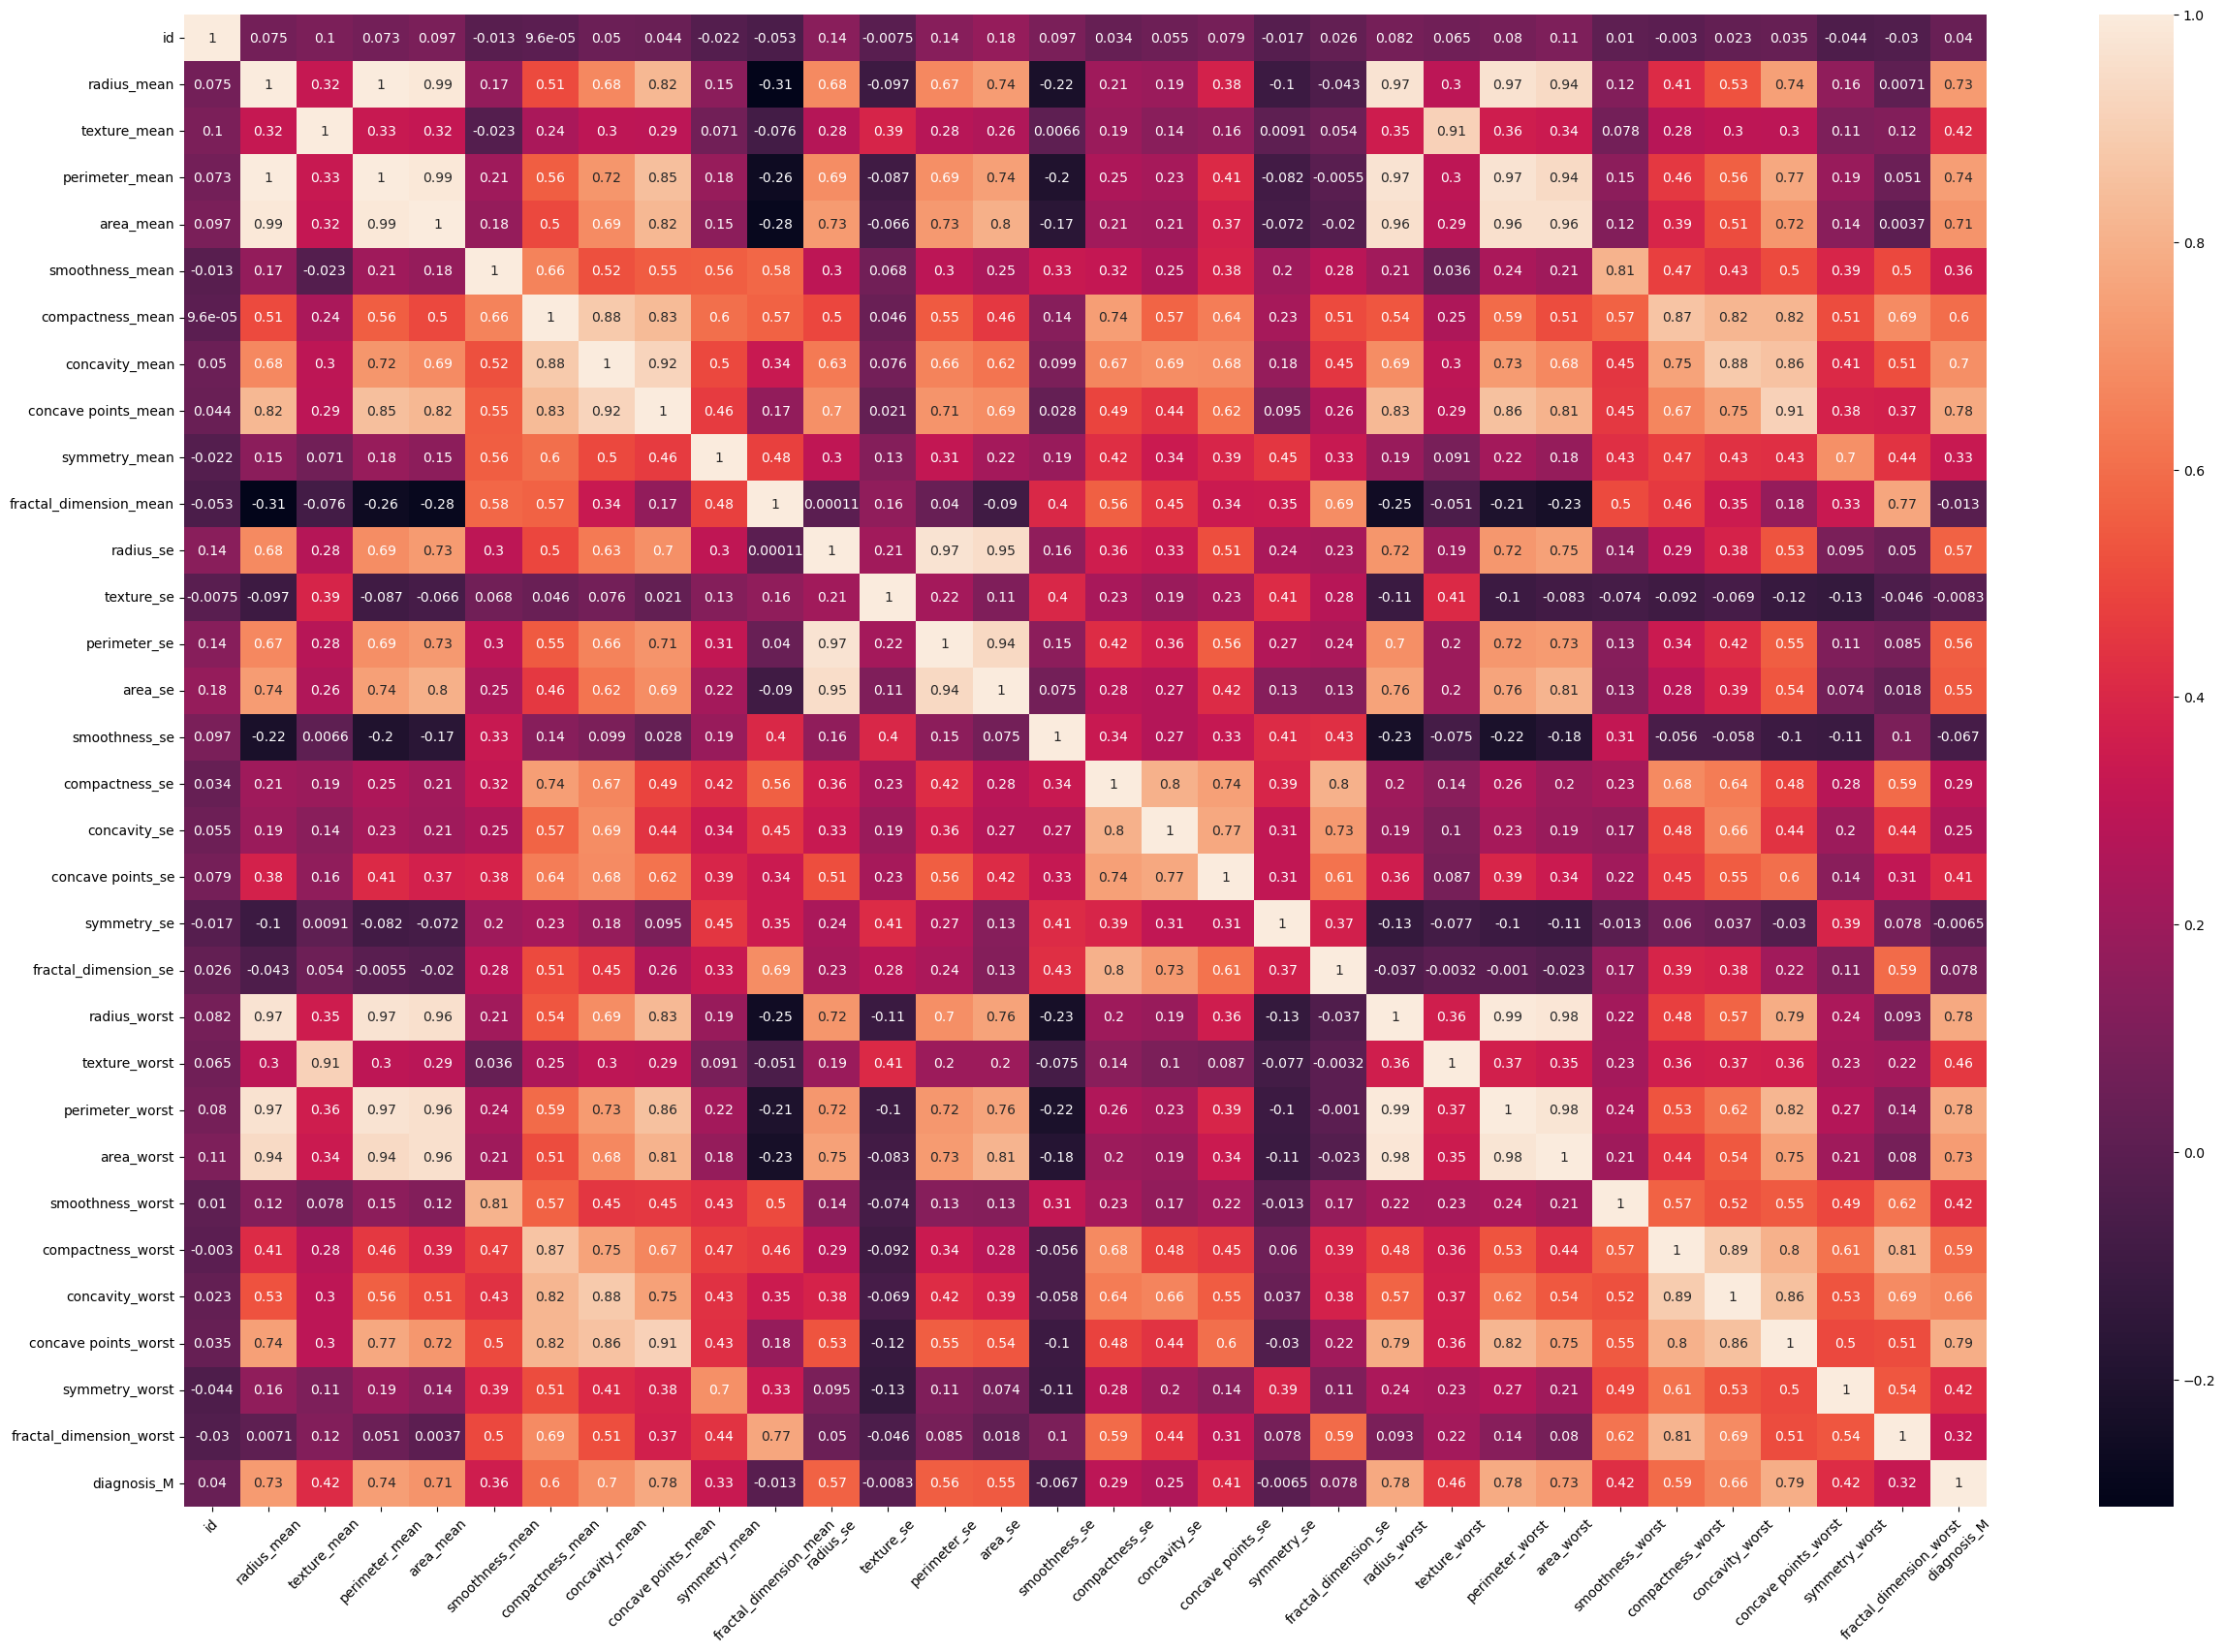

In [35]:
# Heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(corr,
            annot=True,
           );
plt.xticks(rotation=45);

### Split Dataset into Train & Test (X & y) using Scikit-Learn (sklearn)

Official documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [36]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [37]:
# matrix of features / independent variables
# from index location 1 lower boundary to index location -1 for upper boundary
X = dataset.iloc[:, 1:-1].values

In [38]:
X.shape # 569 rows and 30 columns

(569, 30)

In [39]:
# target variable / dependant variable
y = dataset.iloc[:, -1].values # select onlhy the last column / target variable

In [40]:
y.shape # 569 rows and 1 column

(569,)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# split dataset into X & y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=0,
)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

### Feature Scaling
`Bring all the independent variables on the same scale.`

Official documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [44]:
# Import the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

In [45]:
# Instantiate the StandardScaler
sc = StandardScaler()

In [46]:
# Scale the features
# Calculate the mean and standard deviation for the training set (X)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
X_train[:1]

array([[-1.15036482, -0.39064196, -1.12855021, -0.95876358,  0.3109837 ,
        -0.5959945 , -0.80259612, -0.80249002,  0.29453906,  0.0942515 ,
        -0.4950523 ,  1.48720153, -0.51448782, -0.49154005,  0.28149837,
        -0.60451206, -0.46900701, -0.61170002,  0.05798237, -0.35763702,
        -1.0431756 ,  0.21353282, -1.0360446 , -0.84880771,  0.34249851,
        -0.73009743, -0.81232053, -0.75798367, -0.01614761, -0.38503402]])

In [48]:
X_test[:1]

array([[-0.20175604,  0.3290786 , -0.13086754, -0.27145506,  1.02919769,
         0.86411836,  0.73363898,  0.85669688,  1.12032775,  1.5535848 ,
        -0.04197566, -0.51588206,  0.13154087, -0.13875636, -0.55953973,
        -0.13797354,  0.0980708 ,  0.28751196, -0.42446141,  0.11305149,
         0.03150414,  0.67628886,  0.18528621, -0.06280808,  1.10353068,
         0.87444267,  1.2190909 ,  1.3893291 ,  1.08203284,  1.54029664]])

## Part 2: Building the Model

In [49]:
# !jupyter --version

In [50]:
# import jupyter_core
# jupyter_core.__version__

### 1. Logistic Regression

Read more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [51]:
# Import the Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

In [52]:
# Create our Logistic Regression model
classifier_lr = LogisticRegression(random_state=0)

In [53]:
# Train our Logistic Regresion model
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [54]:
y_preds = classifier_lr.predict(X_test)

In [55]:
type(y_preds)

numpy.ndarray

### Evaluate our Logistic Regression Model Using Evaluation Metrics

* [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)
* [F1-Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* [Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)
* [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)
* [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

In [56]:
from sklearn.metrics import accuracy_score, f1_score, \
    precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [57]:
acc = accuracy_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)
prec = precision_score(y_test, y_preds)
rec = recall_score(y_test, y_preds)

In [58]:
def results(y_test, y_preds):
    '''
    Provide the y_test and y_preds arrays to return the:
    - accuracy score
    - f1-score
    - precision score
    - recall score
    '''
    results = {
        'Accuracy Score': accuracy_score(y_test, y_preds),
        'F1-Score': f1_score(y_test, y_preds),
        'Precision Score': precision_score(y_test, y_preds),
        'Recall Score': recall_score(y_test, y_preds),
    }
    return results

In [59]:
results(y_test, y_preds)

{'Accuracy Score': 0.9649122807017544,
 'F1-Score': 0.9574468085106385,
 'Precision Score': 0.9574468085106383,
 'Recall Score': 0.9574468085106383}

In [60]:
results = pd.DataFrame(
    [['Logistic Regression', acc, f1, prec, rec]],
    columns = ['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall']
)

In [61]:
results

,Model,Accuracy,F1-Score,Precision,Recall
0,Logistic Regression,0.964912,0.957447,0.957447,0.957447


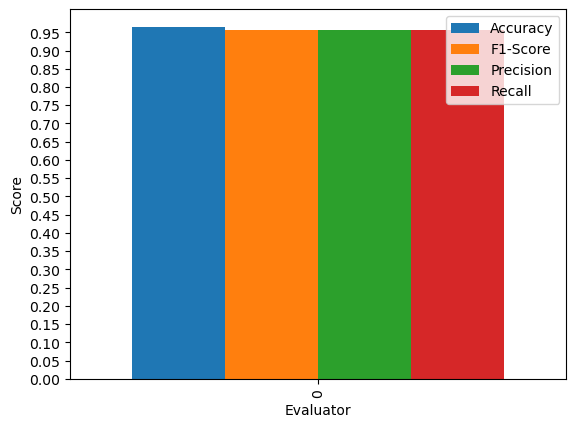

In [62]:
results.plot(kind='bar',
             width=1.5,
             xlabel='Evaluator',
             ylabel='Score')
plt.yticks(np.arange(0, 1, 0.05));

In [63]:
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[65  2]
 [ 2 45]]


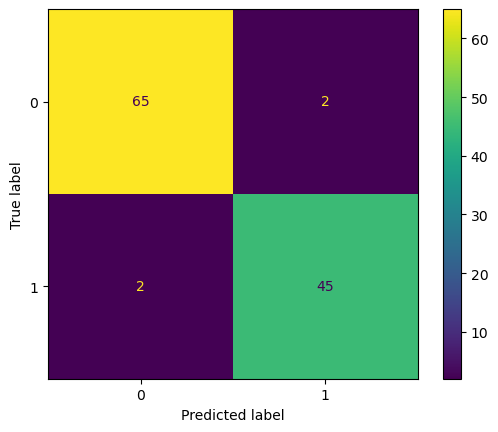

In [64]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

In [65]:
# Import the Cross Validation score
from sklearn.model_selection import cross_val_score

In [66]:
# Calculate the Cross Validation score using 10 CVs (cv=10)
cv_score = cross_val_score(estimator=classifier_lr,
                             X=X_train,
                             y=y_train,
                             cv=10,
                            )

In [67]:
# We now have 10 values for the Accuracy score using Cross Validation
cv_score

array([0.97826087, 0.97826087, 0.97826087, 0.97826087, 0.95652174,
       0.93333333, 1.        , 1.        , 0.97777778, 1.        ])

In [68]:
# Print the mean Accuracy and Standard Deviation of our 10 CVs
print(f"Accuracy is {cv_score.mean()*100:.2f}%")
print(f"Standard Deviation is {cv_score.std()*100:.2f}%")

Accuracy is 97.81%
Standard Deviation is 1.98%


### 2. Random Forest Classifier

Read more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
# Instantiate the Random Forest Classifier
classifier_rm = RandomForestClassifier(random_state=0)

# Fit the model to our train data
classifier_rm.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [71]:
y_preds = classifier_rm.predict(X_test)

In [72]:
y_preds

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=uint8)

In [73]:
# Evaluate our Random Forest Classifier (RFC) model's performance
acc = accuracy_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)
prec = precision_score(y_test, y_preds)
rec = recall_score(y_test, y_preds)

In [74]:
model_results = pd.DataFrame(
    [['Random Forest', acc, f1, prec, rec]],
    columns = ['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall']
)

In [75]:
# Append our RFC results to the initial results we got from Logistic Regression
results = results.append(model_results, ignore_index=True)

C:\Users\rosus\AppData\Local\Temp\ipykernel_17672\2650164288.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index=True)


In [76]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[64  3]
 [ 1 46]]


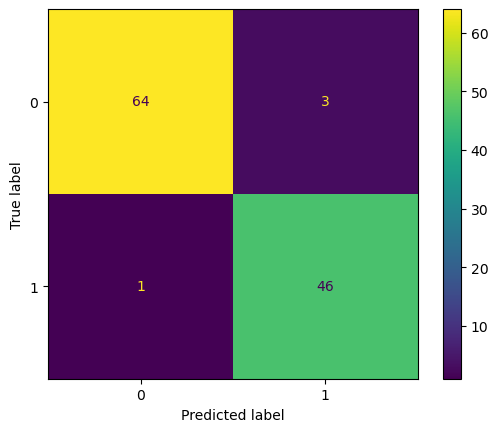

In [77]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

### Cross Validation for RFC

In [78]:
# Import the Cross Validation score
from sklearn.model_selection import cross_val_score

# Calculate the Cross Validation score using 10 CVs (cv=10)
cv_score = cross_val_score(estimator=classifier_rm,
                           X=X_train,
                           y=y_train,
                           cv=10,
                          )

# Print the mean Accuracy and Standard Deviation of our 10 CVs
print(f"Accuracy is {cv_score.mean()*100:.2f}%")
print(f"Standard Deviation is {cv_score.std()*100:.2f}%")

Accuracy is 96.05%
Standard Deviation is 3.07%


We have a lower Accuracy and a higher Standard Deviation (SD) than for the Logistic Regression:
* Accuracy is 97.81%
* Standard Deviation is 1.98% 

... compared to our Random Forest Classifier:   
* Accuracy is 96.05%
* Standard Deviation is 3.07%

`Based on these results we conclude that Logistic Regression is the ideal model for our ML model for the current data.`

## Part 3: Tuning our Model's Hyperparameters

Using `RandomizedSearchCV` to find the best parameters for our Logistic Regression model.

Read about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

Note: _In contrast to `GridSearchCV`, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by `n_iter.`_

In [79]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [80]:
# Define a hyperparameters dictionary we'll use to tune \
# our Logistic Regression model
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

In [81]:
parameters.values()

dict_values([['l1', 'l2', 'elasticnet'], [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0], ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']])

In [82]:
# Instantiate our RandomizedSearchCV class model
random_search = RandomizedSearchCV(
    estimator=classifier_lr,
    param_distributions=parameters,
    n_iter=10,
    scoring='roc_auc',
    n_jobs=-1,
    cv=10,
    verbose=3,
    random_state=0,
)

In [83]:
%%time
# Tune / Train the hyperparameters
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
CPU times: total: 234 ms
Wall time: 2.7 s


C:\Users\rosus\complete_ml_ds_bootcamp_2023\breast-cancer-wisconsin-project\.env\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rosus\complete_ml_ds_bootcamp_2023\breast-cancer-wisconsin-project\.env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rosus\complete_ml_ds_bootcamp_2023\breast-cancer-wisconsin-project\.env\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=se

RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              1.75, 2.0],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=0, scoring='roc_auc', verbose=3)

Check the best estimator, score and the best hyperparameters to use.

In [84]:
random_search.best_estimator_

LogisticRegression(penalty='l1', random_state=0, solver='saga')

In [85]:
random_search.best_score_

0.9965010141987829

In [86]:
random_search.best_params_

{'solver': 'saga', 'penalty': 'l1', 'C': 1.0}

## Part 4: Final Model (Logistic Regression)

In [87]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(C=1.5, 
                                penalty='l1', 
                                random_state=0, 
                                solver='saga',
                               )
classifier.fit(X_train, y_train)

C:\Users\rosus\complete_ml_ds_bootcamp_2023\breast-cancer-wisconsin-project\.env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1.5, penalty='l1', random_state=0, solver='saga')

In [88]:
y_preds = classifier.predict(X_test)

In [89]:
acc = accuracy_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)
prec = precision_score(y_test, y_preds)
rec = recall_score(y_test, y_preds)

model_results = pd.DataFrame(
    [['Final Logistic Regression', acc, f1, prec, rec]],
    columns = ['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall']
)

results = results.append(model_results, ignore_index=True)
results

C:\Users\rosus\AppData\Local\Temp\ipykernel_17672\2157174488.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index=True)


,Model,Accuracy,F1-Score,Precision,Recall
0,Logistic Regression,0.964912,0.957447,0.957447,0.957447
1,Random Forest,0.964912,0.958333,0.938776,0.978723
2,Final Logistic Regression,0.956140,0.946237,0.956522,0.936170


In [90]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(estimator=classifier,
                           X=X_train,
                           y=y_train,
                           cv=10,
                          )

print(f"Accuracy is {cv_score.mean()*100:.2f}%")
print(f"Standard Deviation is {cv_score.std()*100:.2f}%")

Accuracy is 98.24%
Standard Deviation is 2.16%


C:\Users\rosus\complete_ml_ds_bootcamp_2023\breast-cancer-wisconsin-project\.env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rosus\complete_ml_ds_bootcamp_2023\breast-cancer-wisconsin-project\.env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rosus\complete_ml_ds_bootcamp_2023\breast-cancer-wisconsin-project\.env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rosus\complete_ml_ds_bootcamp_2023\breast-cancer-wisconsin-project\.env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rosus\complete_ml_ds_bootcamp_2023\breast-cancer-wiscon

## Part 5: Predicting a Single Observation

In [91]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [148]:
row = dataset.iloc[568][1:-1]
row_list = list(row)
row_list

[7.76,
 24.54,
 47.92,
 181.0,
 0.05263,
 0.04362,
 0.0,
 0.0,
 0.1587,
 0.05884,
 0.3857,
 1.428,
 2.548,
 19.15,
 0.007189,
 0.00466,
 0.0,
 0.0,
 0.02676,
 0.002783,
 9.456,
 30.37,
 59.16,
 268.6,
 0.08996,
 0.06444,
 0.0,
 0.0,
 0.2871,
 0.07039]

In [149]:
# Scale the features on which we are predicting using sc.transform
single_prediction = classifier.predict(sc.transform([row_list]))
print(f"The prediction for this data has the value of {single_prediction[0]}.")
print("This cancer is malignant." if single_prediction[0] else "This cancer is benign.")

The prediction for this data has the value of 0.
This cancer is benign.


In [150]:
row = dataset.iloc[0][1:-1]
row_list = list(row)
row_list

single_prediction = classifier.predict(sc.transform([row_list]))
print(f"The prediction for this data has the value of {single_prediction[0]}.")
print("This cancer is malignant." if single_prediction[0] else "This cancer is benign.")

The prediction for this data has the value of 1.
This cancer is malignant.
